In [1]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import Dataset
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from collections import defaultdict
import random

In [2]:
# If you want to use photos from google drive:
# 1. Open this link https://drive.google.com/drive/folders/1_U3udvWsm1bq6P_m8VUO9jDlGO14zPcl?usp=drive_link
# 2. Go to "Shared with me", right click on shared directory (photos) and click "Organize" -> "Add shortcut" -> "My drive"
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folders_train = {
    "/content/drive/MyDrive/photos/train_val/amsterdam/database/images":"netherlands",
    "/content/drive/MyDrive/photos/train_val/amman/database/images":"jordan",
    "/content/drive/MyDrive/photos/train_val/budapest/database/images":"hungary",
    "/content/drive/MyDrive/photos/train_val/goa/query/images":"india",
    "/content/drive/MyDrive/photos/train_val/moscow/query/images":"russia",
    "/content/drive/MyDrive/photos/train_val/paris/query/images":"france",
    "/content/drive/MyDrive/photos/train_val/zurich/query/images":"switzerland",
    "/content/drive/MyDrive/photos/train_val/nairobi/database/images":"kenya",
    "/content/drive/MyDrive/photos/train_val/ottawa/database/images":"canada",
    "/content/drive/MyDrive/photos/train_val/toronto/database/images":"canada",
    "/content/drive/MyDrive/photos/train_val/trondheim/database/images":"norway",
    "/content/drive/MyDrive/photos/train_val/boston/database/images":"usa",
    "/content/drive/MyDrive/photos/train_val/phoenix/query/images":"usa",
    "/content/drive/MyDrive/photos/train_val/saopaulo/query/images":"brazil",
    "/content/drive/MyDrive/photos/train_val/tokyo/database/images":"japan",
    "/content/drive/MyDrive/photos/test/athens/query/images":"grece",
    "/content/drive/MyDrive/photos/test/bengaluru/query/images":"india",
    "/content/drive/MyDrive/photos/test/kampala/query/images":"uganda",
    "/content/drive/MyDrive/photos/test/stockholm/query/images":"switzerland"
}

country_to_continent = {
  "netherlands": "Europe",
  "jordan": "Asia",
  "hungary": "Europe",
  "india": "Asia",
  "russia": "Europe",
  "france": "Europe",
  "switzerland": "Europe",
  "kenya": "Africa",
  "canada": "North America",
  "norway": "Europe",
  "usa": "North America",
  "brazil": "South America",
  "japan": "Asia",
  "grece": "Europe",
  "uganda": "Africa",
}

def take_images(folders):
  all_image_paths = []
  i = 0
  for folder in folders.keys():
      print("Sprawdzam folder:", folder)
      for root, _, files in os.walk(folder):
          for file in files:
              if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                  full_path = os.path.join(root, file)
                  all_image_paths.append(full_path)
  return all_image_paths

def data_stats(full_train_dataset):
    country_labels = [full_train_dataset.targets_dict[path.rsplit('/', 1)[0]] for path in full_train_dataset.images_paths]
    continent_labels = [country_to_continent[full_train_dataset.targets_dict[path.rsplit('/', 1)[0]]]for path in full_train_dataset.images_paths]

    country_counts = Counter(country_labels)
    continent_counts = Counter(continent_labels)

    print("Liczba zdjęć treningowych:", len(full_train_dataset))
    print("\n")
    for country, count in country_counts.items():
        print(f"{country}: {count} obrazów")
    print("\n")
    for continent, count in continent_counts.items():
        print(f"{continent}: {count} obrazów")

def max_count_country(full_train_dataset):

    country_labels = [full_train_dataset.targets_dict[path.rsplit('/', 1)[0]] for path in full_train_dataset.images_paths]

    country_counts = Counter(country_labels)

    max_count = max([count for country, count in country_counts.items()])
    return max_count

class ImageDataset(Dataset):
    def __init__(self, images_paths, targets_dict, country_to_continent, transform=None):
        self.images_paths = images_paths
        self.transform = transform
        self.targets_dict = targets_dict
        self.country_to_continent = country_to_continent

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, idx):
        image_path = self.images_paths[idx]
        image = Image.open(image_path).convert("RGB")
        target = self.targets_dict[image_path.rsplit('/',1)[0]]
        general_label = self.country_to_continent[target]

        if self.transform:
            image = self.transform(image)

        return image, target, general_label

In [4]:
transform = transforms.Compose([
    transforms.Resize((128, 170)),
    transforms.ToTensor()
])

In [5]:
# Rest a little, watch some TikToks, it will take up to 10 min
# Ignore warnings about Google Drive
# There are breaks in loading

train_files = take_images(folders_train) # 483601 files

Sprawdzam folder: /content/drive/MyDrive/photos/train_val/amsterdam/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/amman/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/budapest/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/goa/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/moscow/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/paris/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/zurich/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/nairobi/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/ottawa/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/toronto/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/trondheim/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/boston/database/images
Sprawdzam folder: /content/drive/My

Liczba zdjęć treningowych: 97962


Struktura danych
Przykłady zdjęć


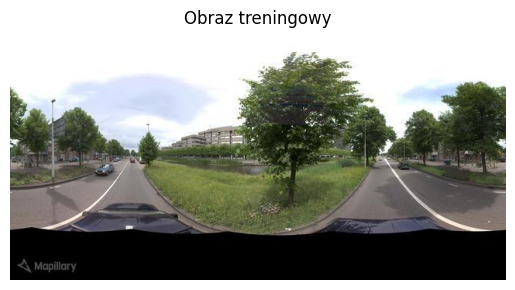

In [6]:
# <-- IMPORTANT INFO -->
# This code is used to investigate data
# You don't have to run it

print("Liczba zdjęć treningowych:", len(train_files))
print("\n")

print("Struktura danych")


print("Przykłady zdjęć")
img = cv2.imread(train_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Obraz treningowy")
plt.axis('off')
plt.show()

In [7]:
# <-- IMPORTANT INFO -->
# ImageDataset object returning 3 values - image, label (Country), general_label (continent)

# Important step - normalizing images
full_train_dataset = ImageDataset(train_files, folders_train, country_to_continent, transform=transform)

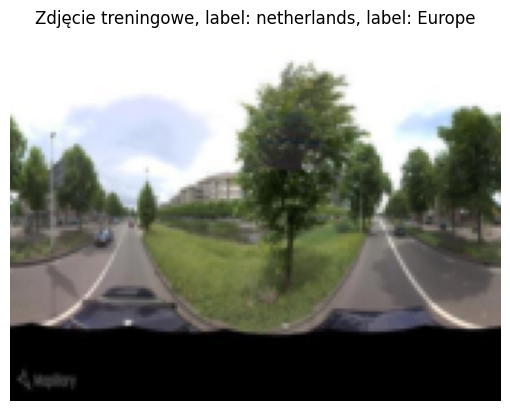

In [8]:
# <-- IMPORTANT INFO -->
# This code is used to investigate data
# You don't have to run it

image_train, label_train, general_label_train = full_train_dataset[0]
image_np_train = image_train.permute(1, 2, 0).numpy()

plt.imshow(image_np_train)
plt.title(f"Zdjęcie treningowe, label: {label_train}, label: {general_label_train}")
plt.axis('off')
plt.show()

In [9]:
data_stats(full_train_dataset)

Liczba zdjęć treningowych: 97962


netherlands: 11539 obrazów
jordan: 953 obrazów
india: 12388 obrazów
france: 8480 obrazów
switzerland: 9012 obrazów
kenya: 437 obrazów
canada: 12789 obrazów
norway: 5015 obrazów
usa: 14024 obrazów
brazil: 18989 obrazów
grece: 2466 obrazów
uganda: 1870 obrazów


Europe: 36512 obrazów
Asia: 13341 obrazów
Africa: 2307 obrazów
North America: 26813 obrazów
South America: 18989 obrazów


In [10]:
# <-- IMPORTANT INFO -->
# Jak można zobaczyć wyżej mamy problem z równomiernym rozkładem datasetu, szczególnie z danymi z Afryki
# Stworzyliśmy dataset z równomiernym rozkładem zdjęć z danych państw poprzez wyrzucenie losowych danych

In [11]:
# Zanim dane zostaną zredukowane, można spróbować znaleźć inne zbiory danych np. z innych krajów lub dogenerować zdjęcia

#Code with augmentation

In [12]:
max_count = 10000

In [13]:
def take_images_with_augmentation(folders,max_count):
  all_image_paths = []
  i = 0
  country_to_folder = {}
  for folder in folders.keys():
      if not folders[folder] in country_to_folder.keys():
          country_to_folder[folders[folder]] = []
      country_to_folder[folders[folder]].append(folder)

  for country in country_to_folder.keys():
      folder_images = []
      for folder in country_to_folder[country]:
        for root, _, files in os.walk(folder):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')): # Sprawdź rozszerzenia plików obrazów
                    full_path = os.path.join(root, file)
                    folder_images.append(full_path)
      if len(folder_images) < max_count:
          num_to_add = max_count - len(folder_images)
          additional_paths = random.choices(folder_images, k=num_to_add)
          folder_images.extend(additional_paths)
      all_image_paths.extend(folder_images)

  return all_image_paths
#is one of possibility to transform
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

files_train_augmentation = take_images_with_augmentation(folders_train,max_count)
full_train_dataset_with_augmentation = ImageDataset(files_train_augmentation, folders_train, country_to_continent, transform=train_transform)

In [14]:
data_stats(full_train_dataset_with_augmentation )

Liczba zdjęć treningowych: 525368


netherlands: 11539 obrazów
jordan: 10000 obrazów
hungary: 153321 obrazów
india: 12388 obrazów
russia: 77496 obrazów
france: 10000 obrazów
switzerland: 10000 obrazów
kenya: 10000 obrazów
canada: 82545 obrazów
norway: 10000 obrazów
usa: 64267 obrazów
brazil: 18989 obrazów
japan: 34823 obrazów
grece: 10000 obrazów
uganda: 10000 obrazów


Europe: 282356 obrazów
Asia: 57211 obrazów
Africa: 20000 obrazów
North America: 146812 obrazów
South America: 18989 obrazów


In [15]:
def show_image(image_, label_, general_label_):
  image_np_train = image_.permute(1, 2, 0).numpy()
  plt.imshow(image_np_train)
  plt.title(f"Zdjęcie treningowe, label: {label_}, label: {general_label_}")
  plt.axis('off')
  plt.show()

In [16]:
train_len = int(0.8 * len(full_train_dataset_with_augmentation))
val_len = len(full_train_dataset_with_augmentation) - train_len
train_dataset, val_dataset_paths = random_split(full_train_dataset_with_augmentation, [train_len, val_len]) # Zwróć uwagę, że walidacyjny zbiór danych na tym etapie nie ma transformacji walidacyjnych

val_image_paths = [files_train_augmentation[i] for i in val_dataset_paths.indices]

val_dataset = ImageDataset(
    val_image_paths,
    targets_dict=full_train_dataset_with_augmentation.targets_dict,
    country_to_continent=full_train_dataset_with_augmentation.country_to_continent,
    transform=transform
)


train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [17]:
print("Liczba zdjęć treningowych:", len(train_dataset))
print("Liczba zdjęć walidacyjnych:", len(val_dataset))

Liczba zdjęć treningowych: 420294
Liczba zdjęć walidacyjnych: 105074


In [18]:
# Przycinanie danych

# 1. Zgrupuj indeksy po krajach
country_to_indices = defaultdict(list)

for idx, path in enumerate(full_train_dataset.images_paths):
    country = full_train_dataset.targets_dict[path.rsplit("/", 1)[0]]
    country_to_indices[country].append(idx)

# 2. Znajdź minimalną liczbę zdjęć dla kraju
min_count = min(len(indices) for indices in country_to_indices.values())
print(f"Minimalna liczba zdjęć w kraju: {min_count}")

# 3. Wybierz losowo min_count zdjęć z każdego kraju
balanced_indices = []

for indices in country_to_indices.values():
    balanced_indices.extend(random.sample(indices, min_count))

# 4. Zbuduj nową listę ścieżek
balanced_image_paths = [full_train_dataset.images_paths[i] for i in balanced_indices]

# 5. Utwórz nowy zbalansowany ImageDataset
balanced_train_dataset = ImageDataset(
    balanced_image_paths,
    targets_dict=full_train_dataset.targets_dict,
    country_to_continent=full_train_dataset.country_to_continent,
    transform=full_train_dataset.transform
)

print(f"Liczba obrazów po undersamplingu: {len(balanced_train_dataset)}")

Minimalna liczba zdjęć w kraju: 437
Liczba obrazów po undersamplingu: 5244


In [19]:
data_stats(balanced_train_dataset)

Liczba zdjęć treningowych: 5244


netherlands: 437 obrazów
jordan: 437 obrazów
india: 437 obrazów
france: 437 obrazów
switzerland: 437 obrazów
kenya: 437 obrazów
canada: 437 obrazów
norway: 437 obrazów
usa: 437 obrazów
brazil: 437 obrazów
grece: 437 obrazów
uganda: 437 obrazów


Europe: 2185 obrazów
Asia: 874 obrazów
Africa: 874 obrazów
North America: 874 obrazów
South America: 437 obrazów


In [20]:
# Split data to training dataset and validation dataset
train_len = int(0.8 * len(balanced_train_dataset))
val_len = len(balanced_train_dataset) - train_len
train_dataset, val_dataset = random_split(balanced_train_dataset, [train_len, val_len])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

num_epochs = 10

In [21]:
print("Liczba zdjęć treningowych:", len(train_dataset))
print("Liczba zdjęć walidacyjnych:", len(val_dataset))

Liczba zdjęć treningowych: 4195
Liczba zdjęć walidacyjnych: 1049


# Ocr, do usunięcia

In [22]:
# for i in range(200):
#   temp = train_dataset[i]
#   show_image(temp[0],f"id: {i} "+temp[1],temp[2])

In [23]:
# !pip install easyocr

In [24]:
# import torchvision
# import torchaudio
# import easyocr
# import numpy as np

In [25]:
# example = train_dataset[10]

In [26]:
# temp = (example[0] * 255).permute(1, 2, 0).cpu().numpy().astype(np.uint8)
# gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray, 'gray')

In [27]:
# all_languages = [
#     'abq', 'en'
# ]

# reader = easyocr.Reader(all_languages, gpu=False)

# results = reader.readtext(gray)

# for bbox, text, conf in results:
#     print(f"Text: {text} (Confidence: {conf:.2f})")

In [28]:
# Można pisać model

# Model, torch

In [37]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()

        weight_decay = 0.005

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # nn.Conv2d(64, 128, kernel_size=3, padding=1),
            # nn.ReLU(),
            # nn.Conv2d(128, 128, kernel_size=3),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.dropout1 = nn.Dropout(0.3)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(78720, 512)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1)


In [38]:
device = ('cpu' if not torch.cuda.is_available() else 'cuda')

num_classes = len(country_to_continent)
model = CNNModel(num_classes).to(device)

In [39]:
from torch.optim import Adam

lr = 1e-4

optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [40]:
num_epochs = 2

In [41]:
country_to_target = {
  "netherlands": 0,
  "jordan": 1,
  "hungary": 2,
  "india": 3,
  "russia": 4,
  "france": 5,
  "switzerland": 6,
  "kenya": 7,
  "canada": 8,
  "norway": 9,
  "usa": 10,
  "brazil": 11,
  "japan": 12,
  "grece": 13,
  "uganda": 14,
}

In [42]:
def labels_to_targets_helper(labels):
  temp = []
  for i in labels:
    temp.append(country_to_target[i])
  return torch.tensor(temp)

In [43]:
torch.cuda.empty_cache()

In [44]:
from tqdm import tqdm

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  correct = 0
  total = 0

  for inputs, label, label_general in tqdm(train_loader):
    label = labels_to_targets_helper(label)
    inputs = torch.stack([inputs[0], inputs[1]], dim=0)
    inputs, label = inputs.to(device), label.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, label)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    train_loss += loss.item() * inputs.size(0)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == label).sum().item()
    total += label.size(0)

  train_loss /= total
  train_acc = correct / total

  # Validation
  model.eval()
  val_loss = 0.0
  correct_val = 0
  total_val = 0

  with torch.no_grad():
    for inputs, label, label_general in tqdm(val_loader):
      label = labels_to_targets_helper(label)
      inputs = torch.stack([inputs[0], inputs[1]], dim=0)
      inputs, label = inputs.to(device), label.to(device)
      outputs = model(label)
      loss = criterion(outputs, label)

      val_loss += loss.item() * inputs.size(0)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == label).sum().item()
      total_val += label.size(0)

  val_loss /= total_val
  val_acc = correct / total_val

  print(f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

  5%|▍         | 100/2098 [02:43<54:18,  1.63s/it]


KeyboardInterrupt: 